# Pipeline for SVM Classification

This pipeline demonstrates a complete workflow for applying a Support Vector Machine (SVM) classification model to distinguish between two conditions. The purpose of this pipeline is to explore the effectiveness of SVMs in classifying multi-dimensional data and visualizing the impact of key parameters like regularization (`C`) on model performance.

Created by ChatGPT; reviewed and edited by **Saman Abbaspoor** in the **Neurosyntax Academy**,

---

## Overview of the Pipeline

### Part 1: Simulating Neural Firing Rates
- **Objective**: Generate synthetic neural data representing firing rates for two experimental conditions.
- Data is simulated using Gaussian distributions to represent neural responses:
  - **Condition 1**:
    - Single Gaussian distribution with a mean of 5 and standard deviation of 1.
  - **Condition 2**:
    - A bimodal distribution combining:
      - $ \mathbf{N}(1, 1) $: Lower firing rates.
      - $ \mathbf{N}(10, 1) $: Higher firing rates.
- These firing rates are used to construct a dataset for binary classification, where:
  - Class labels (0 or 1) correspond to the two conditions.

---

### Part 2: Data Transformation and Visualization
- **Objective**: Explore the data in its original and transformed forms to understand separability.
- Steps:
  1. **Scatter Plot of Original Firing Rates**:
     - Visualizes the firing rates for both conditions along a single dimension.
  2. **Transformation (Squared Firing Rates)**:
     - Applies a non-linear transformation (\( Y^2 \)) to investigate whether transformation improves separability.
  3. **Scatter Plot of Transformed Data**:
     - Plots transformed values against the original firing rates for comparison.

---

### Part 3: SVM Classification
- **Objective**: Train and evaluate an SVM classifier on the simulated data.
- **Steps**:
  1. Combine firing rates and conditions into a single dataset.
  2. Perform hyperparameter tuning using `GridSearchCV`:
     - **Parameter grid**: Regularization parameter \( C \) values ranging from 0.01 to 1000.
     - **Scoring metric**: Accuracy with 5-fold cross-validation.
  3. Identify the best \( C \) value and evaluate the model:
     - The best regularization parameter is determined based on cross-validation accuracy.
     - The final SVM model is used to predict class labels on the entire dataset.
  4. **Model Evaluation**:
     - Outputs a classification report summarizing precision, recall, and F1 scores.

---

## Key Insights
- This pipeline demonstrates:
  - The flexibility of SVMs in handling high-dimensional neural data.
  - The impact of hyperparameter tuning (e.g., \( C \)) on classification performance.
  - The power of data transformation (e.g., \( Y^2 \)) in enhancing separability.
- The visualization and classification steps provide a comprehensive view of how simulated neural firing rates can be analyzed and modeled effectively.

---

## Applications
This pipeline can be adapted for:
- Analyzing real neural data.
- Testing different classifiers or transformation techniques.
- Exploring the role of hyperparameters in classification performance.

---


# Import libraries

In [1]:
# Import relevant libraries
import numpy as np
import matplotlib.pyplot as plt

# Importing necessary libraries
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import make_circles

from scipy.stats import permutation_test


# Easy problem

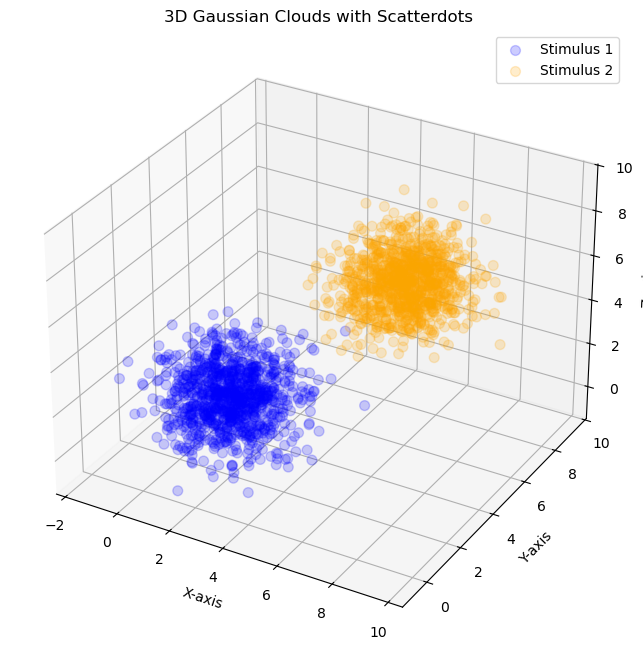

In [3]:
# Generate two separate Gaussian clouds in 3D space
n_samples = 1000

# Gaussian cloud for Stimulus 1 (mean=[2, 2, 2], std=1)
stimulus_1 = np.random.normal(loc=2, scale=1, size=(n_samples, 3))

# Gaussian cloud for Stimulus 2 (mean=[6, 6, 6], std=1)
stimulus_2 = np.random.normal(loc=6, scale=1, size=(n_samples, 3))

# Combine data
points = np.vstack([stimulus_1, stimulus_2])
conditions = np.array([0] * n_samples + [1] * n_samples)  # 0 for stimulus 1, 1 for stimulus 2

# Plot the 3D scatter plot with scatterdots and updated properties
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with updated properties
ax.scatter(points[conditions == 0][:, 0], points[conditions == 0][:, 1], points[conditions == 0][:, 2],
           color='blue', s=50, alpha=0.2, label='Stimulus 1')  # s controls dot size
ax.scatter(points[conditions == 1][:, 0], points[conditions == 1][:, 1], points[conditions == 1][:, 2],
           color='orange', s=50, alpha=0.2, label='Stimulus 2')

# Labels and legend
ax.set_title("3D Gaussian Clouds with Scatterdots")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
ax.legend()
plt.show()


## Linear SVM decoder


In [6]:
# Prepare the dataset
X = points  # Features (3D points)
y = conditions  # Labels (binary classes: 0 or 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a linear SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Output the results
print(f"Accuracy of the Linear SVM: {accuracy:.2f}")
print("Classification Report:")
print(report)


Accuracy of the Linear SVM: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       302
           1       1.00      1.00      1.00       298

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



# Cross-validation

In [9]:
# Prepare the dataset
X = points  # Features (3D points)
y = conditions  # Labels (binary classes: 0 or 1)

# Step 2: Define the linear SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Step 4: Evaluate the model using 10-fold cross-validation
cv_scores = cross_val_score(svm_model, X, y, cv=10, scoring='accuracy')

# Step 5: Report the cross-validation performance
print("10-Fold Cross-Validation Performance:")
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.2f}")
print(f"Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.2f}")


10-Fold Cross-Validation Performance:
Cross-Validation Accuracy Scores: [1.    1.    1.    1.    0.995 1.    1.    1.    1.    1.   ]
Mean Cross-Validation Accuracy: 1.00
Standard Deviation of Cross-Validation Accuracy: 0.00


# Precision, Recall, F1-Score, and Support

## 1. Precision
**Precision** measures how many of the predicted positive instances are actually positive. It is also known as **positive predictive value**.

$$
\text{Precision} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Positives (FP)}}
$$

- **True Positives (TP):** Correctly predicted positive instances.
- **False Positives (FP):** Instances predicted as positive but are actually negative.

- **High Precision:** Indicates that most positive predictions are correct.

---

## 2. Recall
**Recall** measures how many of the actual positive instances were correctly predicted. It is also known as **sensitivity** or **true positive rate**.

$$
\text{Recall} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Negatives (FN)}}
$$

- **True Positives (TP):** Correctly predicted positive instances.
- **False Negatives (FN):** Instances that are positive but were incorrectly predicted as negative.

- **High Recall:** Indicates the model captures most of the positive instances.

---

## 3. F1-Score
**F1-score** is the harmonic mean of Precision and Recall. It provides a single metric that balances both Precision and Recall.

$$
\text{F1-Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

- F1-Score is high only when both Precision and Recall are high.
- It is useful when there is an **imbalance in class distribution**.

---

## 4. Support
**Support** refers to the number of actual occurrences of each class in the dataset.

- For class \(k\), support is the count of instances where the true label is \(k\).
- It provides context to the Precision, Recall, and F1-Score metrics.

---

## Example Confusion Matrix

|                 | Predicted Positive | Predicted Negative |
|-----------------|-------------------|-------------------|
| **Actual Positive** | True Positive (TP)   | False Negative (FN)  |
| **Actual Negative** | False Positive (FP)  | True Negative (TN)   |

---

## Example Metric Calculation
For a binary classification problem:
- **TP** = 50, **FP** = 10, **FN** = 20, **TN** = 100.

1. **Precision**:
   $$
   \text{Precision} = \frac{50}{50 + 10} = 0.833 \, (83.3\%)
   $$

2. **Recall**:
   $$
   \text{Recall} = \frac{50}{50 + 20} = 0.714 \, (71.4\%)
   $$

3. **F1-Score**:
   $$
   \text{F1-Score} = 2 \cdot \frac{0.833 \cdot 0.714}{0.833 + 0.714} = 0.769 \, (76.9\%)
   $$

4. **Support**:
   $$
   \text{Support} = 70 \, \text{(for the positive class)}.
   $$

---

## How to Interpret These Metrics
- **Precision**: Focused on the correctness of positive predictions. Useful in applications like fraud detection where false positives are costly.
- **Recall**: Focused on capturing all actual positives. Useful in medical diagnoses where missing a positive case is critical.
- **F1-Score**: Balances Precision and Recall when there is class imbalance.
- **Support**: Shows the distribution of the classes, helping contextualize the other metrics.


# Precision-Recall

![Precision-Recall Curve](https://upload.wikimedia.org/wikipedia/commons/2/26/Precisionrecall.svg)


# Hyperparameters

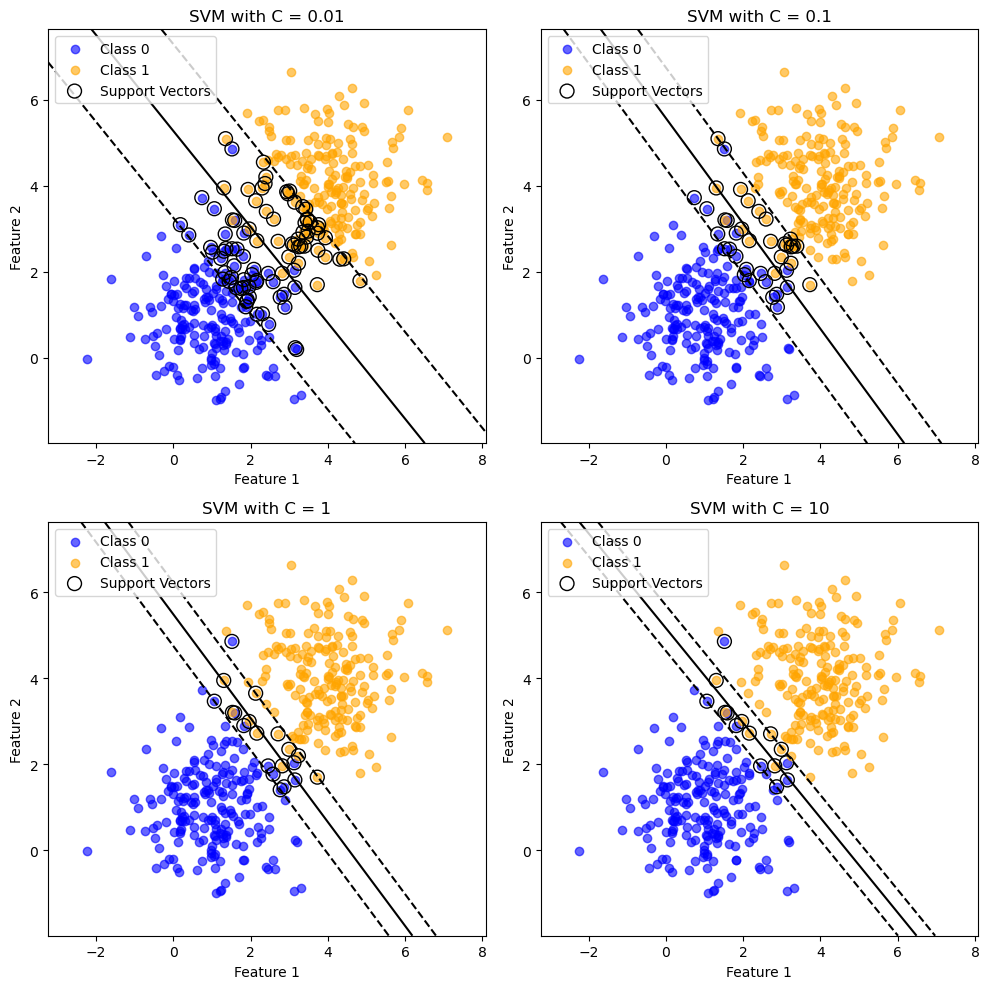

In [12]:
# Generate two Gaussian clouds
np.random.seed(42)
n_samples = 200
X1 = np.random.normal(loc=[1, 1], scale=1, size=(n_samples, 2))
X2 = np.random.normal(loc=[4, 4], scale=1, size=(n_samples, 2))

# Combine the two clouds into a single dataset
X = np.vstack((X1, X2))
y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

# Define different values for the C parameter
C_values = [0.01, 0.1, 1, 10]

# Create a 2x2 subplot design
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.ravel()

for idx, C in enumerate(C_values):
    # Train a linear SVM with the specified C value
    svm = SVC(kernel='linear', C=C, random_state=42)
    svm.fit(X, y)
    
    # Create a mesh grid to evaluate the decision function
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Compute the decision function for each point in the mesh
    Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the data points
    axes[idx].scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Class 0', alpha=0.6)
    axes[idx].scatter(X[y == 1, 0], X[y == 1, 1], color='orange', label='Class 1', alpha=0.6)
    
    # Plot the decision boundary and margins
    axes[idx].contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')
    
    # Highlight support vectors
    support_vectors = svm.support_vectors_
    axes[idx].scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, 
                      facecolors='none', edgecolors='black', label='Support Vectors')

    # Title and labels
    axes[idx].set_title(f"SVM with C = {C}")
    axes[idx].set_xlabel("Feature 1")
    axes[idx].set_ylabel("Feature 2")
    axes[idx].legend()

plt.tight_layout()
plt.show()


# Hyperparameter Tuning

In [16]:
# Generate two Gaussian clouds
np.random.seed(42)
n_samples = 200
X1 = np.random.normal(loc=[1, 1], scale=1, size=(n_samples, 2))
X2 = np.random.normal(loc=[2, 2], scale=1, size=(n_samples, 2))

# Combine the two clouds into a single dataset
X = np.vstack((X1, X2))
y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

# Define the parameter grid for C
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000]  # Regularization parameter
}

# Initialize the SVM model with a fixed kernel (e.g., linear)
svm = SVC(kernel='linear', random_state=42)

# Perform GridSearchCV to find the best C parameter
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X, y)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the results
print("Best C Parameter:")
print(best_params)
print(f"\nBest Cross-Validation Accuracy: {best_score:.2f}")

# Evaluate the best model on the entire dataset
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X)
print("\nClassification Report:")
print(classification_report(y, y_pred))


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best C Parameter:
{'C': 0.01}

Best Cross-Validation Accuracy: 0.74

Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.74      0.75       200
         1.0       0.75      0.75      0.75       200

    accuracy                           0.75       400
   macro avg       0.75      0.75      0.75       400
weighted avg       0.75      0.75      0.75       400



# Feature Weight (Linear SVM)

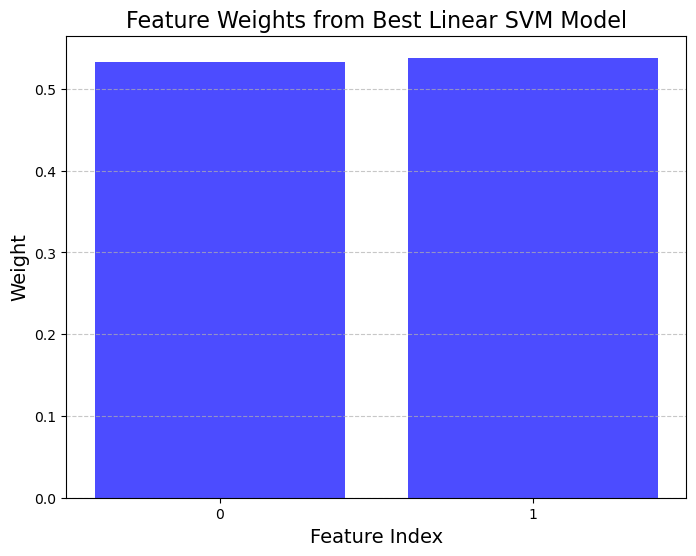

In [ ]:
# Extract feature weights from the best linear SVM model
best_weights = best_model.coef_[0]

# Plot the feature weights
plt.figure(figsize=(8, 6))
plt.bar(range(len(best_weights)), best_weights, color='blue', alpha=0.7)
plt.title("Feature Weights from Best Linear SVM Model", fontsize=16)
plt.xlabel("Feature Index", fontsize=14)
plt.ylabel("Weight", fontsize=14)
plt.xticks(range(len(best_weights)))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Non-linear SVM with RBF kernel

# Radial Basis Function (RBF) Kernel

The **Radial Basis Function (RBF) kernel**, also known as the **Gaussian kernel**, is a commonly used kernel in support vector machines (SVMs) and other machine learning algorithms. It maps data into a higher-dimensional space where it becomes more likely to be linearly separable.

---

## Definition

The RBF kernel computes the similarity between two data points $ \mathbf{x}_i $ and $ \mathbf{x}_j $ based on their distance in the input space. The similarity decreases exponentially as the distance increases.

---

## Mathematical Formula

The RBF kernel function is given by:

$$
K(\mathbf{x}_i, \mathbf{x}_j) = \exp\left(-\gamma \|\mathbf{x}_i - \mathbf{x}_j\|^2\right)
$$

---

### Explanation of Terms

1. $ K(\mathbf{x}_i, \mathbf{x}_j) $: Kernel value (similarity measure) between points $ \mathbf{x}_i $ and $ \mathbf{x}_j $.
2. $ \|\mathbf{x}_i - \mathbf{x}_j\|^2 $: Squared Euclidean distance between $ \mathbf{x}_i $ and $ \mathbf{x}_j $.
3. $ \gamma $: A free parameter that defines the influence of a single training example.

---

## How It Works
- When $ \|\mathbf{x}_i - \mathbf{x}_j\| $ is small (i.e., $ \mathbf{x}_i $ and $ \mathbf{x}_j $ are close in the feature space), $ K(\mathbf{x}_i, \mathbf{x}_j) $ approaches 1, indicating high similarity.
- When $ \|\mathbf{x}_i - \mathbf{x}_j\| $ is large, $ K(\mathbf{x}_i, \mathbf{x}_j) $ approaches 0, indicating low similarity.

---

## Role of $ \gamma $
- **Small $ \gamma $:** Points far apart in the feature space have significant influence, resulting in a smoother decision boundary.
- **Large $ \gamma $:** Only points very close to each other in the feature space have influence, leading to more complex and localized decision boundaries.

---

## Why RBF Kernel?
1. **Non-linear Mapping:** It maps data into a higher-dimensional space without explicitly computing the transformation, enabling the classification of non-linearly separable data.
2. **Generalization:** The RBF kernel is effective for a wide range of datasets and often generalizes well.

---

## When to Use
- The dataset is not linearly separable.
- You expect that the relationship between features and target classes is non-linear.
- You are working with a dataset where the number of features is relatively small compared to the number of samples.


![Gaussian RBF Kernel](https://www.researchgate.net/profile/Johan-Suykens/publication/3207903/figure/fig1/AS:669061079896084@1536528000641/Example-of-a-kernel-function-The-Gaussian-radial-basis-function-kernel-is-shown-here-for_W640.jpg)


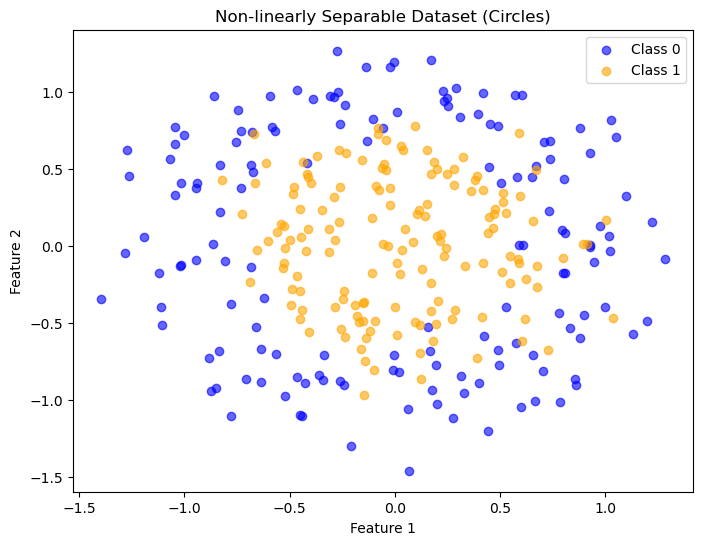

In [26]:
# Create a non-linearly separable dataset
X, y = make_circles(n_samples=300, factor=0.5, noise=0.2, random_state=42)

# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Class 0', alpha=0.6)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='orange', label='Class 1', alpha=0.6)
plt.title("Non-linearly Separable Dataset (Circles)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [27]:
# Step 1: Split the data into training and testing sets
X_train_1D, X_test_1D, y_train_1D, y_test_1D = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Define the linear SVM model
mdl = SVC(kernel='rbf', random_state=42)

# Step 3: Train the model on the training set
mdl.fit(X_train_1D, y_train_1D)

# Step 4: Evaluate the model using 10-fold cross-validation
cv_scores_1D = cross_val_score(mdl, X_train_1D, y_train_1D, cv=10, scoring='accuracy')

# Step 5: Report the cross-validation performance
print("10-Fold Cross-Validation Performance:")
print(f"Cross-Validation Accuracy Scores: {cv_scores_1D}")
print(f"Mean Cross-Validation Accuracy: {cv_scores_1D.mean():.2f}")
print(f"Standard Deviation of Cross-Validation Accuracy: {cv_scores_1D.std():.2f}")

# Step 6: Evaluate the model on the test set
y_test_pred_1D = mdl.predict(X_test_1D)
print("\nClassification Report on Test Set:")
print(classification_report(y_test_1D, y_test_pred_1D))


10-Fold Cross-Validation Performance:
Cross-Validation Accuracy Scores: [0.95238095 0.9047619  0.71428571 0.9047619  0.95238095 0.85714286
 0.76190476 0.80952381 0.95238095 0.85714286]
Mean Cross-Validation Accuracy: 0.87
Standard Deviation of Cross-Validation Accuracy: 0.08

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        38
           1       0.96      0.88      0.92        52

    accuracy                           0.91        90
   macro avg       0.91      0.92      0.91        90
weighted avg       0.92      0.91      0.91        90



# Illustrating the kernel trick

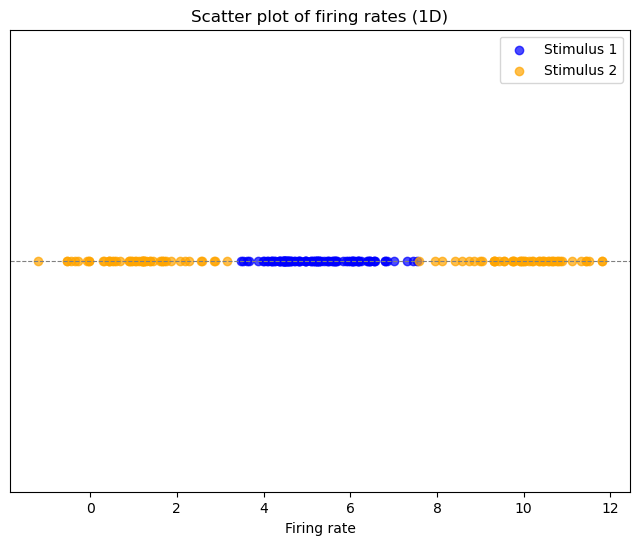

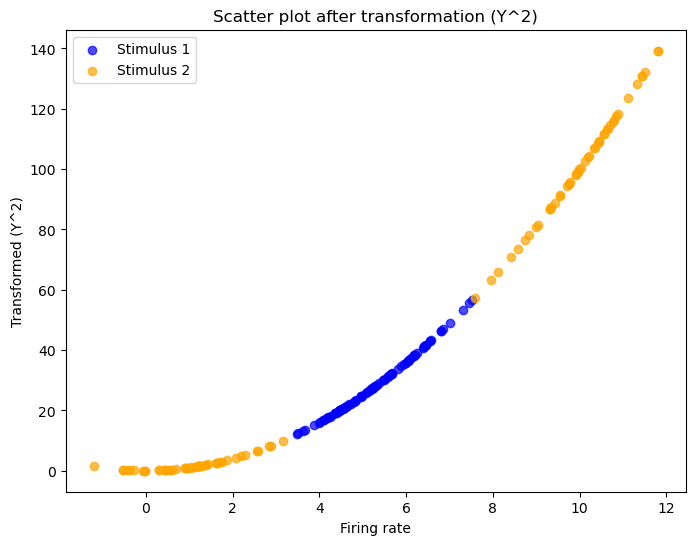

In [28]:
# Simulate neural firing rates using Gaussian distributions
n_samples = 100

# Firing rates for condition 1 (stimulus 1) from Gaussian(mean=5, std=1)
condition_1 = np.random.normal(5, 1, n_samples)

# Firing rates for condition 2 (stimulus 2) from Gaussian(mean=1, std=1) and Gaussian(mean=8, std=1)
condition_2_part1 = np.random.normal(1, 1, n_samples // 2)
condition_2_part2 = np.random.normal(10, 1, n_samples // 2)
condition_2 = np.concatenate([condition_2_part1, condition_2_part2])

# Combine data
firing_rates = np.concatenate([condition_1, condition_2])
conditions = np.array([0] * n_samples + [1] * n_samples)  # 0 for stimulus 1, 1 for stimulus 2

# Scatter plot of the first dimension with static colors
plt.figure(figsize=(8, 6))
plt.scatter(firing_rates[conditions == 0], np.zeros_like(firing_rates[conditions == 0]), 
            color='blue', alpha=0.7, label='Stimulus 1')
plt.scatter(firing_rates[conditions == 1], np.zeros_like(firing_rates[conditions == 1]), 
            color='orange', alpha=0.7, label='Stimulus 2')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title("Scatter plot of firing rates (1D)")
plt.xlabel("Firing rate")
plt.ylabel("")
plt.yticks([])
plt.legend()
plt.show()

# Transform data using Y^2
transformed_rates = firing_rates ** 2

# Scatter plot of the transformed data with static colors
plt.figure(figsize=(8, 6))
plt.scatter(firing_rates[conditions == 0], transformed_rates[conditions == 0], 
            color='blue', alpha=0.7, label='Stimulus 1')
plt.scatter(firing_rates[conditions == 1], transformed_rates[conditions == 1], 
            color='orange', alpha=0.7, label='Stimulus 2')
plt.title("Scatter plot after transformation (Y^2)")
plt.xlabel("Firing rate")
plt.ylabel("Transformed (Y^2)")
plt.legend()
plt.show()


In [29]:
# Prepare the dataset
X_1D = firing_rates.reshape(-1, 1)  # Features (firing rates in 1D)
y_1D = conditions  # Labels (binary classes: 0 or 1)

# Split the data into training and testing sets
X_train_1D, X_test_1D, y_train_1D, y_test_1D = train_test_split(X_1D, y_1D, test_size=0.3, random_state=42)

# Train a linear SVM
svm_model_1D = SVC(kernel='linear', random_state=42)
svm_model_1D.fit(X_train_1D, y_train_1D)

# Make predictions on the test set
y_pred_1D = svm_model_1D.predict(X_test_1D)

# Evaluate the model
accuracy_1D = accuracy_score(y_test_1D, y_pred_1D)
report_1D = classification_report(y_test_1D, y_pred_1D)

# Output the results
print(f"Accuracy of the Linear SVM (1D): {accuracy_1D:.2f}")
print("Classification Report:")
print(report_1D)



Accuracy of the Linear SVM (1D): 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.81        31
           1       1.00      0.48      0.65        29

    accuracy                           0.75        60
   macro avg       0.84      0.74      0.73        60
weighted avg       0.83      0.75      0.73        60



# Label Shuffling Test: Two-Way Permutation Test

The **label shuffling test** (a type of two-way permutation test) is a non-parametric statistical test used to evaluate whether the observed relationship between two variables (e.g., groups and outcomes) is statistically significant. It is particularly useful when the assumptions of traditional parametric tests (e.g., normality or homoscedasticity) are violated.

---

## Key Idea
The test assesses the null hypothesis by randomly shuffling labels (or group assignments) many times and comparing the observed statistic (e.g., mean difference, correlation) to the distribution of statistics from the shuffled data.

---

## Steps of a Label Shuffling Test
1. **Compute the Observed Statistic**:
   - Calculate the test statistic (e.g., mean difference, variance, or correlation) from the original data.

2. **Shuffle Labels**:
   - Randomly shuffle the group or condition labels while keeping the data values fixed. This breaks any existing relationship between the labels and outcomes, simulating the null hypothesis (no relationship).

3. **Recalculate the Test Statistic**:
   - Calculate the same statistic for the shuffled data. Repeat this process a large number of times (e.g., 1,000 or 10,000 permutations).

4. **Construct the Null Distribution**:
   - Compile the recalculated test statistics from all shuffles into a distribution representing what the test statistic would look like under the null hypothesis.

5. **Calculate the p-value**:
   - Compare the observed statistic to the null distribution. The p-value is the proportion of shuffled test statistics that are as extreme as or more extreme than the observed value.

---

## Example: Comparing Means
Imagine you have two groups (e.g., Treatment and Control) with observed means \( \mu_T \) and \( \mu_C \), and you want to test if the difference \( \Delta = \mu_T - \mu_C \) is significant.

1. Calculate the observed difference in means (\( \Delta_{\text{obs}} \)).
2. Shuffle the group labels (Treatment and Control) and compute \( \Delta \) for the shuffled data.
3. Repeat the shuffling 10,000 times to create a null distribution of \( \Delta \).
4. Compute the p-value:

   $$ 
   p = \frac{\text{Number of shuffled } \Delta \geq |\Delta_{\text{obs}}|}{\text{Total number of permutations}} 
   $$

5. If \( p \) is below your chosen significance level (e.g., 0.05), reject the null hypothesis.

---

## Applications
- **Group Comparisons**:
  - Testing differences in means, medians, or variances between groups.
- **Correlation Testing**:
  - Assessing the strength of the relationship between variables.
- **Feature Importance**:
  - Determining the importance of features in machine learning models.

---

## Advantages
- Does not rely on assumptions about the data distribution (non-parametric).
- Works well for small sample sizes or non-normal data.
- Provides an intuitive, simulation-based approach to hypothesis testing.

---

## Limitations
- Computationally intensive, especially for large datasets or many permutations.
- Results can vary slightly depending on the number of permutations used.
- Interpretation relies on the appropriateness of the null hypothesis (random association due to shuffled labels).

---


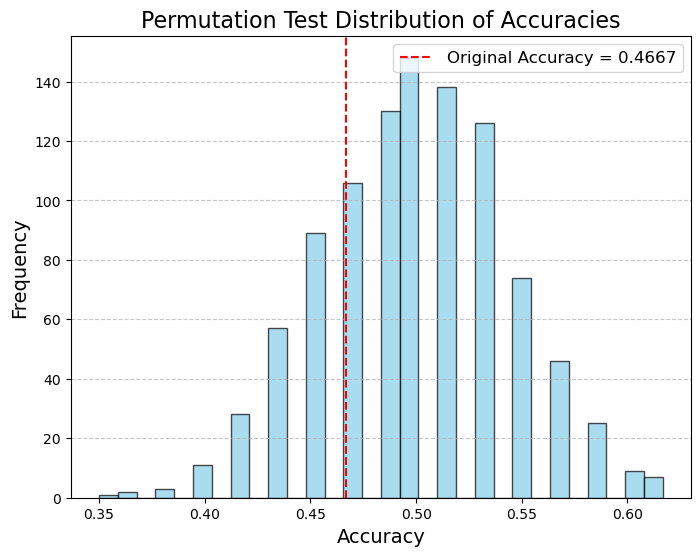

Original Model Accuracy: 0.4667
P-value from Permutation Test: 0.8092


In [31]:
# Generate two Gaussian clouds as before
np.random.seed(42)
n_samples = 200
X1 = np.random.normal(loc=[2, 2], scale=1, size=(n_samples, 2))
X2 = np.random.normal(loc=[2, 2], scale=1, size=(n_samples, 2))

# Combine the two clouds into a single dataset
X = np.vstack((X1, X2))
y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a linear SVM
best_model = SVC(kernel='linear', C=1, random_state=42)
best_model.fit(X_train, y_train)

# Compute the original accuracy
original_accuracy = accuracy_score(y_test, best_model.predict(X_test))


# Define the function to compute accuracy
def accuracy_func(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

# Perform the permutation test and extract the distribution
permutation_result = permutation_test(
    data=(y_test, best_model.predict(X_test)),
    statistic=lambda y_true, y_pred: accuracy_score(y_true, y_pred),
    n_resamples=1000,
    alternative='greater',
    random_state=42
)

# Extract the null distribution of accuracies
null_distribution = permutation_result.null_distribution

# Extract the p-value
p_value = permutation_result.pvalue

# Plot the permutation distribution
plt.figure(figsize=(8, 6))
plt.hist(null_distribution, bins=30, color='skyblue', edgecolor='k', alpha=0.7)
plt.axvline(original_accuracy, color='red', linestyle='--', label=f'Original Accuracy = {original_accuracy:.4f}')
plt.title("Permutation Test Distribution of Accuracies", fontsize=16)
plt.xlabel("Accuracy", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Output the results
print(f"Original Model Accuracy: {original_accuracy:.4f}")
print(f"P-value from Permutation Test: {p_value:.4f}")
